

## Introduction

This Jupyter notebook is designed as an open-ended project to help you apply your knowledge of Python, including Pandas and NumPy, to explore questions of social relevance.

You can choose from the following topics:

Climate change and its consequences
Health care and its consequences
Education and its consequences
 



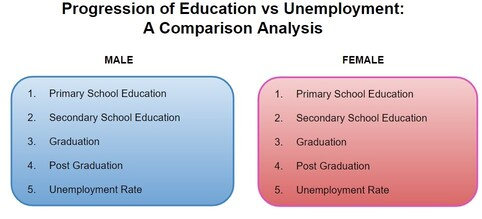


# Data sources

The data source acquired for this project are from:
1.	WorldBank.org
2.	OECD.org

A total of seven datasets are available for analyzing data for comparison and are as follows:

1.	Primary education, Female -https://data.worldbank.org/indicator/SE.PRM.CMPT.FE.ZS
2.	Primary education, Male  - https://data.worldbank.org/indicator/SE.PRM.CMPT.MA.ZS
3.	Progression to secondary school, Female: https://data.worldbank.org/indicator/SE.SEC.PROG.FE.ZS
4.	Progression to secondary school, Male - https://data.worldbank.org/indicator/SE.SEC.PROG.MA.ZS
5.	Secondary graduation rate, Male & Female - https://data.oecd.org/students/secondary-graduation-rate.htm#indicator-chart
6.	Unemployment with advanced education, Female - https://data.worldbank.org/indicator/SL.UEM.ADVN.FE.ZS
7.	Unemployment with advanced education, Male - https://data.worldbank.org/indicator/SL.UEM.ADVN.MA.ZS

All the above datasets are in .csv readable format and contain a list of country names, country codes,  and percentage values for literacy rate, graduation rate and unemployment rate for a given period (years).</br>

### Dataset 1-4 & 6-7:
>  
	These group of datasets, downloaded from one source are obtained in a tabular format of a unique structure. The columns contain a list of countries(266 - based on economy) for a period from 1960 – 2021 (62 years) and indicator name and codes.(Indicators data will not be used for the project)

### Dataset 5:
>  
	This dataset contains data like overall secondary education completion rate, secondary completion for both male and female, Overall post-secondary education and post-secondary completion for both male and female. The total countries listed are only 38 and for the period 2005, 2010-2019. The dataset also contains other vlaues like measure,frequency and flag codes which are not used in the analysis.


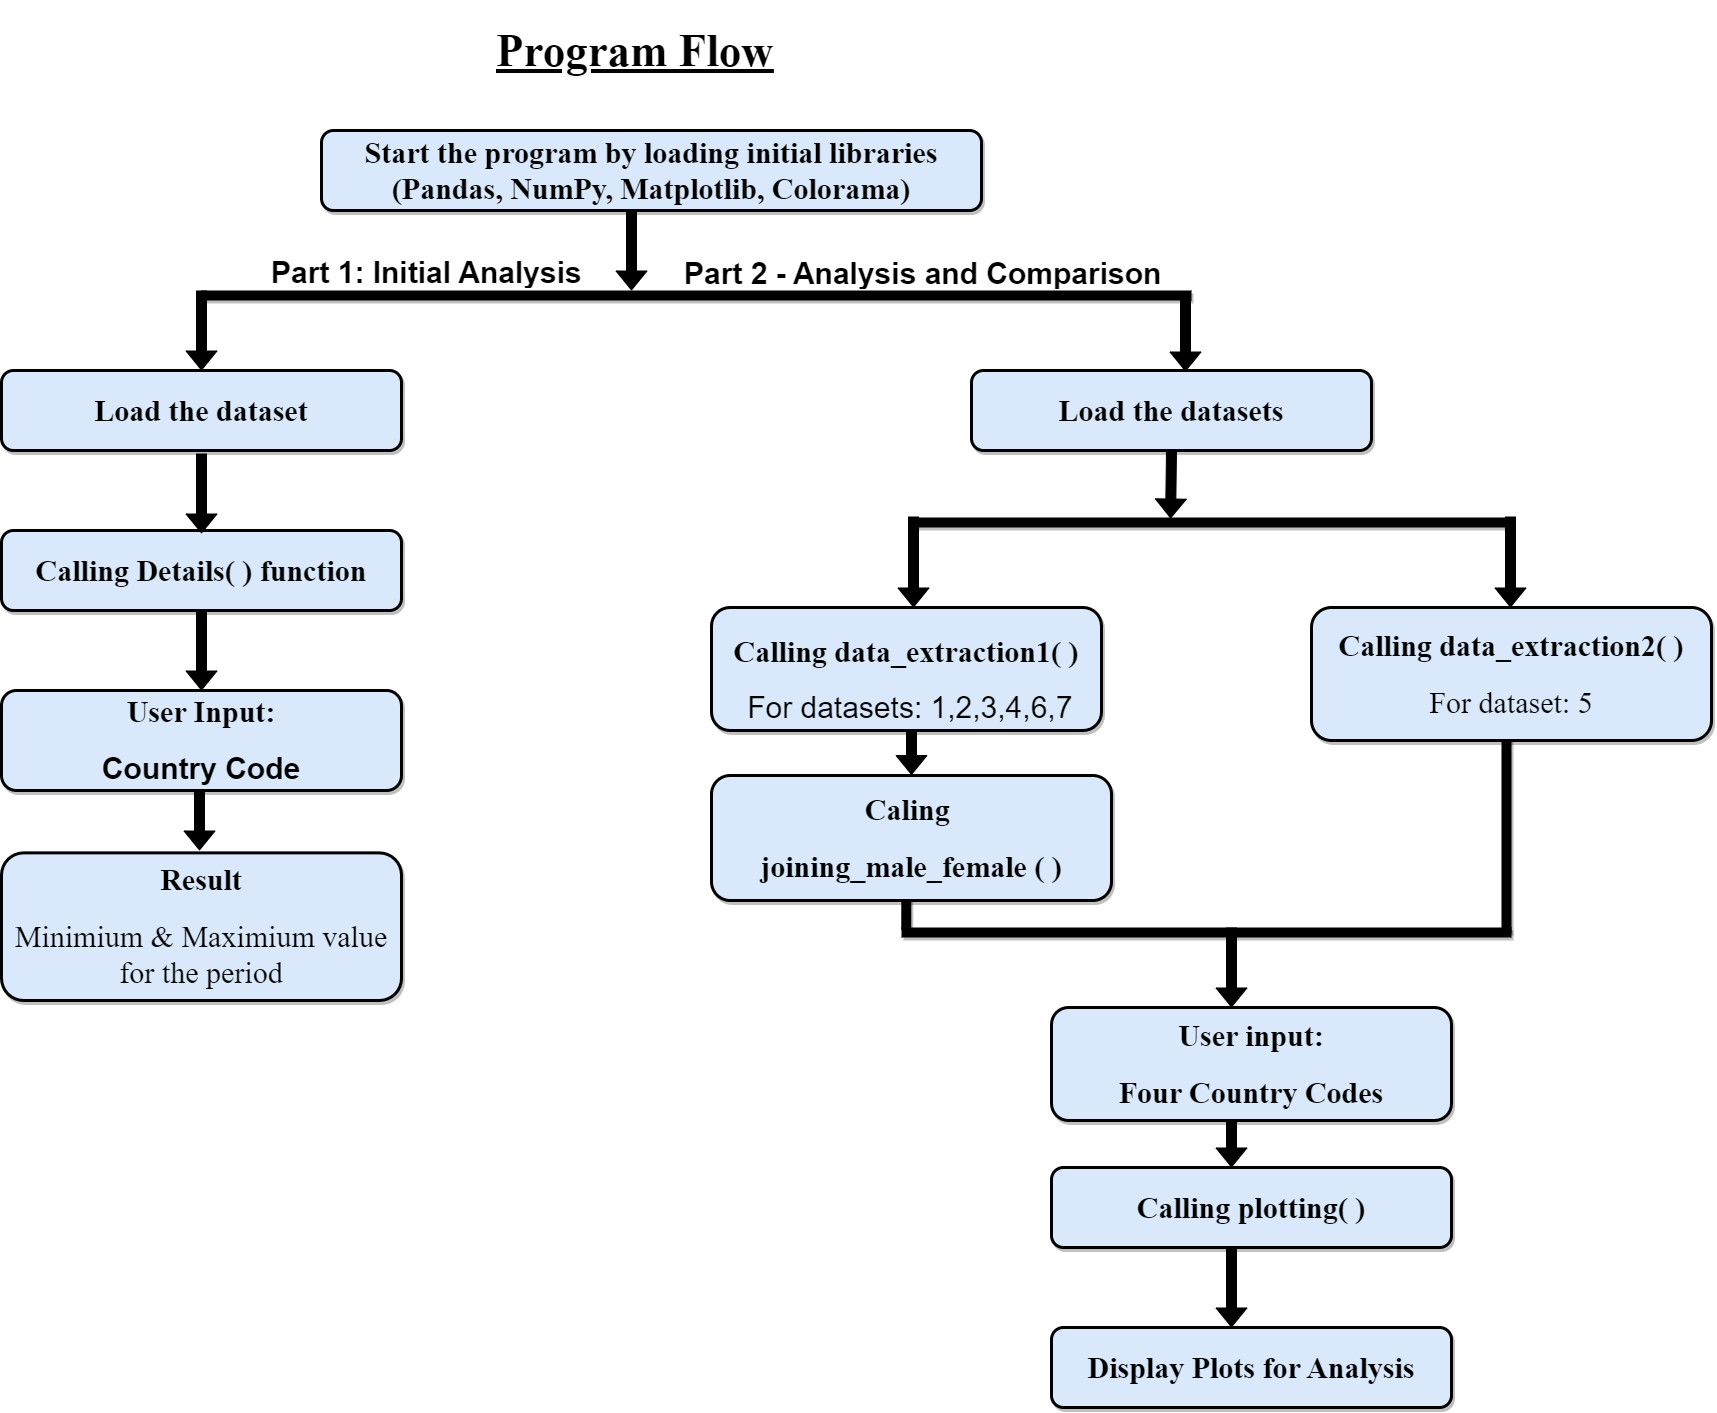

## Part 1: Initial Analysis

As Part 1 of the analysis, we write a function that reads the source data that analyzes the dataset. This function takes a user-entered country code as an input parameter and finds the minimum and maximum percentages and periods for which data is available for that particular country.

In [2]:
# importing the libraries for Pandas, NumPy, Matplotlib & Colorama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from colorama import Fore, Back, Style #To add colour styling for the print function 

In [3]:
# This function takes any one dataset(from primary school male/female,secondary school male/female & unemployment male/female) 
# as input and tries to find the years that has got the minimium and maximium values.   

def details(df):
    
    #Initial cleaning on the dataset    
    df=(df.loc[3:,:] #To remove the first three rows of the dataset (As they are just headings and some irrelevant data)
        .transpose() #To transpose the dataset for initializing the year row as index
        .set_index(3)#Initializing the year column as index
        .transpose())# transposed again to go back to the initial form(country on y axis and years on xaxis)
    
    df.inplace = True # for permenently saving in the dataset.
    df.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name'], inplace = True) # droping these columns as -
    # we are not using them in our program
    
    df = df.set_index('Country Code')# setting y axis index as country code

    #To replace all NaN values as 0 in the dataset
    df.dropna(axis = 'columns', how = 'all' ) # to remove all NaN from columns and rows.
    df.dropna(axis = 'index', how = 'all' ) # to remove all NaN  from index
    df=df.fillna(0) # to replace all NaN  with zeros.

    # Saving the index (Country code & Years) into seperate variables
    country_index=df.index# saving country codes to a new variable
    country_index=country_index.to_numpy()#converting this into a numpy variable
    df=df.T#transposing the dataset to save year index into a variable

    year_index=df.index#year index is saved into the variable
    year_index=year_index.to_numpy()#converting this into a numpy variable
    df=df.T# transposed again to go back to the initial form(country on y axis and years on xaxis)
    
    # To display all the available years and countries 
    # asks the user to input a country for the detailed analysis
    print('This dataset has got values for '+Fore.RED+str(np.size(year_index))+Style.RESET_ALL+' years and they are: \n\n')
    print(Fore.GREEN+str(year_index)+Style.RESET_ALL+'\n\n')
    print('This dataset has got the values of: '+Fore.RED+str(np.size(country_index))+Style.RESET_ALL
          +' countries mentioned below\n\n')
    print(Fore.GREEN+str(country_index)+Style.RESET_ALL+'\n')
    
    #The user input for country is saved into a new variable
    print(Fore.BLUE+"To Analyse the data, enter a valid Country code (in Capital letters)"+Style.RESET_ALL+'\n')
    country_code=input()
    print()
    
    #The whole dataset without the index is converted into a numpy variable
    matrix=df.to_numpy()
    
    #The values for user defined country is selected from the matrix
    matrix=matrix[list(country_index).index(country_code),:]

    #Finding the number of zeros in the user defined country
    zero=np.size(matrix)-np.count_nonzero(matrix)# Total number of zeros =total size of the matrix -total number of non zero 
    
    #finding the number of values that are higher than 100 in the given country
    hund=np.count_nonzero(matrix>100)
    
    # Display total zeros and values greater than 100 in the given country
    print('There are a total of '+ Fore.RED+str(np.size(year_index))+Style.RESET_ALL+' Percentage values. Out of that '
          +Fore.RED+str(zero)+Style.RESET_ALL+ ' are zeros and '+Fore.RED+str(hund)+Style.RESET_ALL+' are greater than 100 \n')
    
   
    # To find the years that has got the maximium values
    maxi=np.max(matrix) # finding the maximium % value in the given country
    count_maxi=np.count_nonzero(matrix==maxi)# counting the number of years that has got this maximium value
    maxi_year=year_index[matrix==maxi]# saving the years that has got the maximium values into a new variable
    
    #Printing the years that has got the maximium values
    print('1: Out of '+Fore.RED+str(np.size(year_index))+Style.RESET_ALL+' years, '+Fore.RED+str(count_maxi)+Style.RESET_ALL+' has got the maximum percentage values'+'( '+Fore.RED+str(maxi)+Style.RESET_ALL+' %)\n')
    print ('   These are the years that has got the maximium values'+'( '+Fore.RED+str(maxi)+Style.RESET_ALL+' %)\n')
    print("   "+Fore.GREEN+str(maxi_year)+Style.RESET_ALL+'\n\n')
    
    # To find the years that has got the minimium values
    mini=np.min(matrix)# finding the minimium % value in the given country
    count_mini=np.count_nonzero(matrix==mini)# counting the number of years that has got this minimium value
    mini_year=year_index[matrix==mini]# saving the years that has got the minimium values into a new variable
    
    #Printing the years that has got the minimium values
    print('2: Out of '+Fore.RED+str(np.size(year_index))+Style.RESET_ALL+' years, '+Fore.RED+str(count_mini)+Style.RESET_ALL+' has got the minimium percentage values'+'( '+Fore.RED+str(mini)+Style.RESET_ALL+' %)\n')
    print ('   These are the years that has got the minimium values'+'( '+Fore.RED+str(mini)+Style.RESET_ALL+' %)\n')
    print("   "+Fore.GREEN+str(mini_year)+Style.RESET_ALL)

In [4]:
#Loading the dataset
Primaryschool_male = pd.read_csv('2.csv')
Primaryschool_female = pd.read_csv('1.csv')
secondaryschool_male = pd.read_csv('4.csv')
secondaryschool_female = pd.read_csv('3.csv')
unemployment_male = pd.read_csv('6.csv')
unemployment_female = pd.read_csv('7.csv')

# User input (6 data sets mentioned below)
print("Enter any one of these datasets to get a brief analysis:\n \n"+Fore.BLUE+" Enter 1 for Primaryschool_male \n Enter 2 for Primaryschool_female\n Enter 3 for secondaryschool_male\n Enter 4 for secondaryschool_female\n Enter 5 for unemployment_male\n Enter 6 for unemployment_female \n"+Style.RESET_ALL)
choice=input()  #saving the user choice into a variable
print()

# Calling respective details function
if choice=='1':details(Primaryschool_male)
if choice=='2':details(Primaryschool_female)
if choice=='3':details(secondaryschool_male)
if choice=='4':details(secondaryschool_female)
if choice=='5':details(unemployment_male)
if choice=='6':details(unemployment_female)




Enter any one of these datasets to get a brief analysis:
 
 Enter 1 for Primaryschool_male 
 Enter 2 for Primaryschool_female
 Enter 3 for secondaryschool_male
 Enter 4 for secondaryschool_female
 Enter 5 for unemployment_male
 Enter 6 for unemployment_female 

1

This dataset has got values for 62 years and they are: 


[1960.0 1961.0 1962.0 1963.0 1964.0 1965.0 1966.0 1967.0 1968.0 1969.0
 1970.0 1971.0 1972.0 1973.0 1974.0 1975.0 1976.0 1977.0 1978.0 1979.0
 1980.0 1981.0 1982.0 1983.0 1984.0 1985.0 1986.0 1987.0 1988.0 1989.0
 1990.0 1991.0 1992.0 1993.0 1994.0 1995.0 1996.0 1997.0 1998.0 1999.0
 2000.0 2001.0 2002.0 2003.0 2004.0 2005.0 2006.0 2007.0 2008.0 2009.0
 2010.0 2011.0 2012.0 2013.0 2014.0 2015.0 2016.0 2017.0 2018.0 2019.0
 2020.0 2021.0]


This dataset has got the values of: 266 countries mentioned below


['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 

## Data extraction

The extraction of date is done in two types where, </br>
 <div style="text-align: justify">1: Type 1 extraction is exclusively done for datasets 1,2,3,4,6,7. Here the source data are classified as primary, secondary and unemployment for both male and female indivdually on each datasets</div> </br>
 <div style="text-align: justify">2: Type 2 extraction is done for dataset 5. Here a single dataset contains details of upper secondary(Graduation) and post secondary(post graduation) for both male and female.</div> </br>

Hense extraction functions are written seperately for Type 1 and Type 2 

### Extraction 1: (Dataset 1,2,3,4,6,7)

 >1: Not all the datasets have the same structure.</br>
 
 > 2: Not all the countries and the time periods are same across all the datasets. </br>
 
 > 3: Upon the initial analysis from Part1, we find that most of the countries have zero value for certain periods.  </br>
 
  > <div style="text-align: justify"> 4: The dataset values, which in the case of primary, secondary education completion rate shows the result of more than 100 for some fiscal years. The reason being as explained from the source, The rate is a proxy that should be taken as an upper estimate of the actual primary/secondary completion rate. There are many reasons why the completion rate can exceed 100 percent. The numerator may include late entrants and overage children who have repeated one or more grades of primary education as well as children who entered school early, while the denominator is the number of children at the entrance age for the last grade of primary education.( Source: https://data.worldbank.org/indicator/SE.PRM.CMPT.FE.ZS )</div> </br>
> <div style="text-align: justify">
Hense, Primary, secondary and post secondary completion rate is calculated by dividing the number of new entrants (enrolment minus repeaters) in the last grade of primary education, regardless of age, by the population at the entrance age for the last grade of primary education and multiplying by 100. The reference years reflect the school year for which the data are presented.</div> 

Each record is extracted from the source file. Irrelevant data columns are removed and all NaN values are replaced with zeros. Data for all countries are analyzed and zeros are replaced by the highest value for that country.

### Extraction 2:  (Dataset 5)

>1: This dataset contans  values for both male and female in a single dataset. </br>

>2: Dataset contains details of both upper secondary and post secondary education.</br>

>3:The number of countries and the time period are limited. Hence, there are a lot of inconsistencies in the data.

The dataset is grouped by the education type and gender. Non relevent coloumns are discarded.

In [5]:
# This function takes any one dataset(from promary school male/female,secondary school male/female & unemployment male/female) 
# as input and will clean the rows and columns in such a way that we get some specific countryies (in each row) and some 
# specific years (in each column) as index.

def data_extraction1(dataset):
   
    #Initial cleaning on the dataset
    pd.set_option('display.max_columns',100) #To display only 100 columns even if the original size is more than 100
    dataset=(dataset.loc[3:,:]#To remove the first three rows of the dataset (As they are just headings and some irrelevant data)
             .transpose()#To transpose the dataset for initializing the year row as index
             .set_index(3)#Initializing the year row as index
             .transpose())# transposed again to go back to the initial form(country on y axis and years on xaxis)
             
    dataset.inplace = True #inplace = True: for permenently deleting columns and saving in the dataset.
    dataset.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Name'], inplace = True) # droping these columns as we are not using them in our program
    dataset = dataset.set_index('Country Code')# setting y axis index as country code
    
    #To replace all NaN values as 0 in the dataset
    dataset =dataset.dropna(axis = 'columns', how = 'all' ) # to remove all nan from all columns and rows.
    dataset.dropna(axis = 'index', how = 'all' ) # to remove all nan from all index
    dataset =dataset.fillna(0) # to replace nan with zeros.
    
    dataset.inplace = True#inplace = True: for permenently deleting columns and saving in the dataset.
    dataset.reset_index()
    
    #To extract specific countries from a total of 266 countries and to limit the years from 1999 - 2018.
    dataset =dataset.loc[['AUT','CAN','CHL','DNK','ESP','FIN','HUN','ISR','LTU','LUX','MEX','NOR','POL','PRT','SWE','TUR','USA','GBR','EST','BEL','CRI','KOR','DEU','BRA','SVN','AUS','COL','ITA','CZE','CHE','LVA','SVK','IRL','GRC']]
    dataset =dataset.loc[:,[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]]
    dataset=dataset.T
    col=dataset[['AUT','CAN','CHL','DNK','ESP','FIN','HUN','ISR','LTU','LUX','MEX','NOR','POL','PRT','SWE','TUR','USA','GBR','EST','BEL','CRI','KOR','DEU','BRA','SVN','AUS','COL','ITA','CZE','CHE','LVA','SVK','IRL','GRC']]
    
    #To replace the values of zero with either mean/minimium/maximium of that country
    col.replace(to_replace = 0, value = col.max(),inplace = True) #can change to min/max/mean
    
    #To replace if there are values above 100 with 100
    col[col.loc[:,:]>100]=100 #The numerator may include late entrants and overage children who have repeated one or more grades of primary education as well as children who entered school early, while the denominator is the number of children at the entrance age for the last grade of primary education.
    col=col.reset_index()
      
    return(col) # Returning the cleaned extracted dataset
    
 

In [6]:
# This function takes the graduation (5.csv) dataset as input and will clean and extract dedicated dataframes for
# Upper secondary male,Upper secondary female, Post secondary male and Post secondary female.

def data_extraction2(dataset):
    
    # Droping unnecessary coulums which are not used in our project
    dataset=dataset.drop(columns = ['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes'])
    
    # Grouping the remaining dataset with respect to column 'SUBJECT' (whic has got the unique values for Upper secondary male,
    # Upper secondary female, Post secondary male and Post secondary female.)  
    dataset=dataset.groupby('SUBJECT')
    
    #Extracting values for Upper secondary male
    dataset_male=dataset.get_group('UPPSRY_MEN')
     
    #Extracting values for Upper secondary female
    dataset_female=dataset.get_group('UPPSRY_WOMEN')
   
    #Extracting values for Upper Post secondary male
    dataset_male_pg=dataset.get_group('P_SRY_NTRY_MEN')
   
    #Extracting values for Upper Post secondary female
    dataset_female_pg=dataset.get_group('P_SRY_NTRY_WOMEN')
    
    # returning all the newly created datasets
    return(dataset_male,dataset_female,dataset_male_pg,dataset_female_pg)
      

## Part 2 - Data Analysis and Comparison

In this section we intend to produce a set of data for comparing the education completion rate and its progression to employement for a set of selected countries for a specific period. 

After extracting the data, we will attempt to display the educational attainment rates among men and women for selected countries and time periods by joining the two datasets sorted by year.


In [7]:
# To join the male and female datasets of primary school completion,secondary school progression & unemployment.
# And to insert a SEX (M /F) coulum in the dataset
def joining_male_female(df_male,df_female):
    
    #Saving the number of rows and columns in male dataset
    [row,col]=df_male.shape

    # Creating a list with the value 'M' 
    sex_male=['M']
    sex_male=sex_male*row # Multiplying it row times
    
    # Inserting this newly created SEX column at the first [indx] position in the dataset
    indx=0
    df_male.insert(loc=indx, column='SEX', value=sex_male)

    # Creating a list with the value 'F' 
    sex_female=['F']
    sex_female=sex_female*row # multiplying it row
    
    # Inserting this newly created SEX column at the first [indx] position in the dataset
    df_female.insert(loc=indx, column='SEX', value=sex_female)

    # Merging male and female datasets
    df_male_female = [df_male, df_female]
    df_male_female = pd.concat(df_male_female,ignore_index=True)

    # Renaming the column 3 to 'Years'
    df_male_female=df_male_female.rename(columns={3: 'Years'})

    # Sorting the values with respect to Years
    df_male_female.sort_values("Years",axis = 0, ascending = True,inplace = True)

    # Returning the combined dataset
    return(df_male_female)


In [8]:
# Loading the dataset by doing the data_extraction1 function.
Primaryschool_male = data_extraction1(pd.read_csv('2.csv'))
Primaryschool_female = data_extraction1(pd.read_csv('1.csv'))
secondaryschool_male = data_extraction1(pd.read_csv('4.csv'))
secondaryschool_female = data_extraction1(pd.read_csv('3.csv'))
unemployment_male = data_extraction1(pd.read_csv('6.csv'))
unemployment_female = data_extraction1(pd.read_csv('7.csv'))

# User Input
print("Enter any one of the male and female datasets for joining:\n \n"+Fore.BLUE+" Enter 1 for Primaryschool male & female\n Enter 2 for Secondaryschool male & female\n Enter 3 for Unemployment male & female \n \n"+Style.RESET_ALL)
choice=input()
print()

if choice=='1':joined_df=joining_male_female(Primaryschool_male,Primaryschool_female)
if choice=='2':joined_df=joining_male_female(secondaryschool_male,secondaryschool_female)
if choice=='3':joined_df=joining_male_female(unemployment_male,unemployment_female)

#Displaying the headings
print(Style.BRIGHT+Fore.BLUE+"                                                     Male and Female Joined Dataset")
print("                                                     ------------------------------"+Style.RESET_ALL)

#Displaying the joined dataset
joined_df.set_index(['Years','SEX'])



Enter any one of the male and female datasets for joining:
 
 Enter 1 for Primaryschool male & female
 Enter 2 for Secondaryschool male & female
 Enter 3 for Unemployment male & female 
 

1

                                                     Male and Female Joined Dataset
                                                     ------------------------------


Country Code         AUT        CAN        CHL         DNK         ESP  \
Years  SEX                                                               
1999.0 M      100.000000  95.743896  99.106117  100.000000  100.000000   
       F      100.000000  96.551224  98.916206  100.000000  100.000000   
2000.0 M      100.000000  97.747551  99.106117  100.000000  100.000000   
       F      100.000000  97.891602  98.916206   99.891090  100.000000   
2001.0 M      100.000000  97.747551  99.106117  100.000000  100.000000   
       F      100.000000  97.891602  98.916206  100.000000  100.000000   
2002.0 M      100.000000  97.747551  99.106117  100.000000  100.000000   
       F       99.848640  97.891602  98.916206  100.000000  100.000000   
2003.0 M      100.000000  97.747551  99.106117  100.000000  100.000000   
       F      100.000000  97.891602  98.916206  100.000000  100.000000   
2004.0 F       98.295830  97.891602  98.916206  100.000000  100.000000   
       M       99.169968  97.747551  99.106117  100.000000  100.000000   
2005.0 F      100.000000  97.891602  98.916206  100.000000  100.000000   
       M      100.000000  97.747551  99.106117  100.000000  100.000000   
2006.0 F      100.000000  97.891602  98.916206  100.000000   96.426491   
       M      100.000000  97.747551  99.106117  100.000000   96.871140   
2007.0 F      100.000000  97.891602  98.916206  100.000000   97.153923   
       M      100.000000  97.747551  99.106117  100.000000   97.121948   
2008.0 M      100.000000  97.747551  99.106117  100.000000   97.003181   
       F      100.000000  97.891602  98.916206  100.000000   97.593773   
2009.0 F      100.000000  97.891602  98.916206   98.216278   97.622643   
       M      100.000000  97.747551  99.106117   97.742073   97.341797   
2010.0 M      100.000000  97.747551  99.106117   98.887543   97.456497   
       F      100.000000  97.891602  98.916206   99.364830   96.086861   
2011.0 F       96.205032  97.891602  95.822594   99.688568   96.170860   
       M       97.310966  97.747551  95.610138   99.573776   96.136581   
2012.0 F       97.215248  97.891602  98.916206   98.996727   98.914070   
       M       96.197227  97.747551  98.727501   97.558273   99.705544   
2013.0 M       98.130180  97.747551  99.106117   98.587067   99.008324   
       F       97.056473  97.891602  98.277237  100.000000   99.435410   
2014.0 F       99.008774  97.891602  98.899231   99.230072  100.000000   
       M       98.389297  97.747551  98.901840   98.341362  100.000000   
2015.0 F       99.936813  97.891602  96.837784   98.308327  100.000000   
       M      100.000000  97.747551  97.111259   99.149681  100.000000   
2016.0 F       99.599052  97.891602  94.917381  100.000000  100.000000   
       M       99.711578  97.747551  96.028160  100.000000  100.000000   
2017.0 F      100.000000  97.891602  94.130127  100.000000  100.000000   
       M       98.894783  97.747551  95.355537  100.000000   99.822571   
2018.0 M       99.811813  97.747551  96.716759  100.000000   98.032059   
       F       99.814270  97.891602  95.750572  100.000000   99.052261   

Country Code         FIN         HUN    ISR         LTU        LUX  \
Years  SEX                                                           
1999.0 M       96.072350   97.032997  100.0  100.000000  85.084427   
       F       95.623932   94.900047  100.0   99.746101  86.677742   
2000.0 M       96.004082   97.159477  100.0  100.000000  85.084427   
       F       96.412613   95.645943  100.0  100.000000  86.677742   
2001.0 M      100.000000   98.396828  100.0  100.000000  85.084427   
       F      100.000000   97.619911  100.0  100.000000  86.677742   
2002.0 M      100.000000   99.837936  100.0  100.000000  85.084427   
       F      100.000000   98.970131  100.0  100.000000  86.677742   
2003.0 M      100.000000   96.656036  100.0  100.000000  85.084427   
       F      100.000000   95.693977  100.0  100.000000  86.677742   
2004.0 F      100.000000   94.886757  100.0  100.00

## Programs</br>

<div style="text-align: justify">As part of the project, we will compare primary, secondary, graduate and post-graduation rates in four selected countries, specifically from the EU, and compare the relationship between education and unemployment for men and women. This function is defined to input four country codes of the user's choice. These country codes represent comparative charts related to all education levels and unemployment rates. </div>

Here we select Sweden (SWE), Denmark (DNK), Finland (FIN) and Norway (NOR). Analysis period is from 2010 to 2018. As the result of the function we display subplots for the four countries for the following categories.

#### Plot 1: Primary education rate Male and Female 
#### Plot 2: Secondary education rate Male And Female 
#### Plot 3: Upper Secondary/ Graduate rate Male and Female
#### Plot 4: Post Graduation rate Male and Female 
#### Plot 5: Unemployment rate Male and Female


In [9]:
# For ploting Five seperate graph for 4 independent countries ( 5 x 4, 20 graphs in a single figure)

# Arguments for the plotting function: Male female joined primary education, Male female joined secondary education, Male female joined unemployment
# Upper secondary graduation male,Upper secondary graduation female,Post secondary graduation male,Post secondary graduation female
# Four country codes

def plotting(df_male_female_prim,df_male_female_sec,df_male_grd,df_female_grd, df_male_pg,df_female_pg,
             df_male_female_unemp,country1,country2,country3,country4):
     
    # for plots 1,2,5  arguments include df: male & female combined dataset,cty: country code, axs,r,c : are for subplot
    def _plot1(df,cty,axs,r,c):
        
        # Saving the country index to ind
        df=df.T
        ind=df.index
        ind=ind[2:]
        df=df.T
        df=df.iloc[:,1:]
        
        # changing the remaining dataframe to NumPy matrix
        df_mat=df.to_numpy()
        
        # Saving the first column (The years) of the dataframe into a seperate variable
        Year=df_mat[:,0]
        
        # Finding unique years
        Year=Year[::2]
        
        # Selecting the country from the country index previously saved
        Country=df_mat[:,list(ind).index(cty)+1]

        # Selecting the values for all male (even number positions) from the combined dataset for a specific country
        Country_male=Country[::2]
        # Selecting the values for all female (odd number positions) from the combined dataset for a specific country
        Country_female=Country[1::2]
        
        # Setting x axis as years
        x  = list(Year)
        # Setting y axis as values for male and female
        y0  = list(Country_male)
        y1 = list(Country_female)
        
        # Plotting x,yo & x,y1
        axs[r,c].plot(x,y0,color='r',label='Male')
        axs[r,c].plot(x, y1,color='g',label='Female')
        
        #Limiting the x axis from 2010 to 2018 so that it matches the plot 3 & 4
        axs[r,c].set_xlim([2010, 2018])
        axs[r,c].legend(loc ="upper right")
        axs[r,c].grid()
        axs[r,c].text(0.1, 0., cty, horizontalalignment='center', verticalalignment='center', transform=axs[r,c].transAxes)
        
    # for plots 3 & 4  arguments include df_m: male dataset,df_f: female dataset,cty: country code, axs,r,c : are for subplot    
    def _plot2(df_m,df_f,cty,axs,r,c):
        
        #Selecting values for a specific country from both male and female datasets
        df_m=df_m.loc[df_m['LOCATION'] == cty, :]
        df_f=df_f.loc[df_f['LOCATION'] == cty, :]
    
        # Selecting years from 'TIME' column in the male & female datasets  
        x0  = list(df_m['TIME'])
        x1  = list(df_f['TIME'])
        
        # Selecting percentage values from  male & female datasets 
        y0  = list(df_m['Value'])
        y1 = list(df_f['Value'])
        

        # Plotting x0,yo & x1,y1
        axs[r,c].plot(x0,y0,color='r',label='Male')
        axs[r,c].plot(x1, y1,color='g',label='Female')
        axs[r,c].set_xlim([2010, 2018])
        axs[r,c].legend(loc ="upper right")
        axs[r,c].grid()
        axs[r,c].text(0.1, 0.1, cty, horizontalalignment='center', verticalalignment='bottom', transform=axs[r,c].transAxes)
        
    
    
    # Setting subplot ready with the figure size
    fig, ax = plt.subplots(5, 4, figsize=(13,13)) 
        
    # Displaying a master x label and y label
    fig.supxlabel("Year -------->")
    fig.supylabel("Percentage -------->")
    print()
    
    # Displaying a heading
    print("                       "+Style.BRIGHT+Fore.BLUE +"Comparison of Education level & Unemployment rates of : "+Fore.RED+country1+" , "+country2+" , "+country3+" , "+country4)
    print(Fore.BLUE+"                       "+"------------------------------------------------------------------------------"+Style.RESET_ALL)    
    print("                      "+Style.BRIGHT+Fore.BLUE +Fore.RED+country1+"                      "+country2+"                      "+country3+"                      "+country4)
    
    # Plotting 5 individual graphs for country 1 (_plot1 is used for plot 1,2,5 & _plot2 is used for plot 3,4)
    _plot1(df_male_female_prim,country1,ax,0,0)
    _plot1(df_male_female_sec,country1,ax,1,0)
    _plot2(df_male_grd,df_female_grd,country1,ax,2,0)
    _plot2(df_male_pg,df_female_pg,country1,ax,3,0)
    _plot1(df_male_female_unemp,country1,ax,4,0)
    
    # Plotting 5 individual graphs for country 2 (_plot1 is used for plot 1,2,5 & _plot2 is used for plot 3,4)
    _plot1(df_male_female_prim,country2,ax,0,1)
    _plot1(df_male_female_sec,country2,ax,1,1)
    _plot2(df_male_grd,df_female_grd,country2,ax,2,1)
    _plot2(df_male_pg,df_female_pg,country2,ax,3,1)
    _plot1(df_male_female_unemp,country2,ax,4,1)
    
    # Plotting 5 individual graphs for country 3 (_plot1 is used for plot 1,2,5 & _plot2 is used for plot 3,4)
    _plot1(df_male_female_prim,country3,ax,0,2)
    _plot1(df_male_female_sec,country3,ax,1,2)
    _plot2(df_male_grd,df_female_grd,country3,ax,2,2)
    _plot2(df_male_pg,df_female_pg,country3,ax,3,2)
    _plot1(df_male_female_unemp,country3,ax,4,2)
    
    # Plotting 5 individual graphs for country 4 (_plot1 is used for plot 1,2,5 & _plot2 is used for plot 3,4)
    _plot1(df_male_female_prim,country4,ax,0,3)
    _plot1(df_male_female_sec,country4,ax,1,3)
    _plot2(df_male_grd,df_female_grd,country4,ax,2,3)
    _plot2(df_male_pg,df_female_pg,country4,ax,3,3)
    _plot1(df_male_female_unemp,country4,ax,4,3)
    
  

## Results and Analysis


In this section, we call the functions that allows the user to enter four countries of their choice. This displays graph to compare and analyze the relationship between male and female education levels and unemployment rates for the selected countries.

As mentioned earlier, we will input Sweden, Denmark, Finland and Norway to analyse the education and employment rate. 


In [10]:
#Loading datasets

Primaryschool_male = data_extraction1(pd.read_csv('2.csv'))
Primaryschool_female = data_extraction1(pd.read_csv('1.csv'))

secondaryschool_male = data_extraction1(pd.read_csv('4.csv'))
secondaryschool_female = data_extraction1(pd.read_csv('3.csv'))

unemployment_male = data_extraction1(pd.read_csv('7.csv'))
unemployment_female = data_extraction1(pd.read_csv('6.csv'))

Primaryschool_male_female=joining_male_female(Primaryschool_male,Primaryschool_female)
secondaryschool_male_female=joining_male_female(secondaryschool_male,secondaryschool_female)
[graduation_male,graduation_female,graduation_male_pg,graduation_female_pg]=data_extraction2(pd.read_csv('5.csv'))
unemployment_male_female=joining_male_female(unemployment_male,unemployment_female)

# User input four country codes
print("Enter four country codes from:'AUT','CAN','CHL','DNK','ESP','FIN','HUN','ISR','LTU','LUX','MEX','NOR','POL','PRT','SWE','TUR','USA','GBR','EST','BEL','CRI','KOR','DEU','BRA','SVN','AUS','COL','ITA','CZE','CHE','LVA','SVK','IRL','GRC']] \n")
Country_code1=input('First Country code: ')
Country_code2=input('Second Country code: ')
Country_code3=input('Third Country code: ')
Country_code4=input('Fourth Country code: ')



Enter four country codes from:'AUT','CAN','CHL','DNK','ESP','FIN','HUN','ISR','LTU','LUX','MEX','NOR','POL','PRT','SWE','TUR','USA','GBR','EST','BEL','CRI','KOR','DEU','BRA','SVN','AUS','COL','ITA','CZE','CHE','LVA','SVK','IRL','GRC']] 

First Country code: SWE
Second Country code: DNK
Third Country code: FIN
Fourth Country code: NOR



                       Comparison of Education level & Unemployment rates of : SWE , DNK , FIN , NOR
                       ------------------------------------------------------------------------------
                      SWE                      DNK                      FIN                      NOR


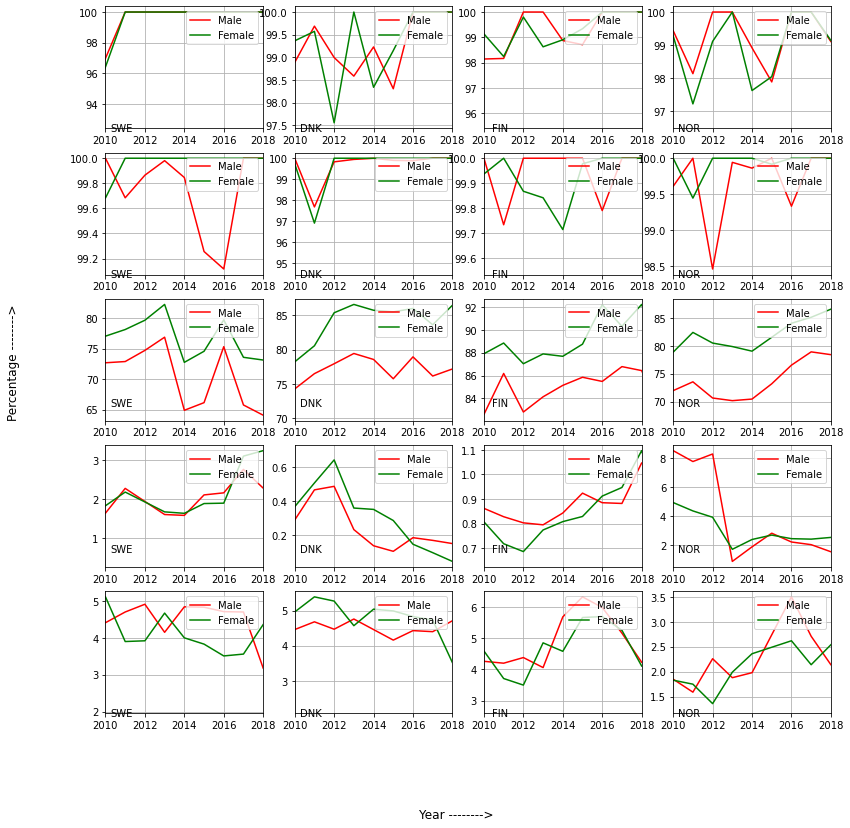

In [11]:
#Plotting and analysing 5 graphs for the four countries entered by the user.
plotting(Primaryschool_male_female,secondaryschool_male_female,graduation_male,graduation_female,graduation_male_pg,graduation_female_pg,unemployment_male_female,Country_code1,Country_code2,Country_code3,Country_code4)


## Conclusion </br> 


<div style="text-align: justify">1: From Plot 1 and Plot 2, we analyse, Primary and Secondary education rates are high across the four EU countries. These countries on average show 97% and above completion rate for both male and female . This mostly might be because, both primary and secondary education are made compulsory for all, by the government.</div> </br> 

<div style="text-align: justify">2: From Plot 4, analysing all the 4 countries,  the percentage of post graduate students dropped significantly, averaging around 1-6% for both men and women. This may be because both male and female graduates prefer to work rather than pursue a higher degree of their interest.</div> </br> 

<div style="text-align: justify">3.Unemployment:Here we are trying to analyse the unemployment among men and women with respect to the graduation and post-graduation charts between these four EU countries over the period from 2010-2018.</div> </br> 

#### Sweden:
> <div style="text-align: justify">There was a Peak in the graduation rate in 2016. Hence, we could see that unemployment among men went down from 4.5- 3% over the period 2016-2018. While, for female, unemployment slightly climbed up from 3.5- 4.3% which probably might be because we see an increase in female post graduates during this period from 2-4%. So we can assume that female individuals mostly preferred to pursue their post-graduation than looking for a job.</div>

#### Denmark:
> <div style="text-align: justify">The unemployment rate for both male and female are quite similar like in  Sweden. We see male unemployment rate is quite steady at 4.5% over the period. We also see the post-graduation rate has gradually declined over the period from 2012-2018 for both male & female. We also see that females’ are graduated more during 2017-2018 than males’ and that might be the reason we see females are employed more during the period 2017- 2018.</div>

#### Finland:
> <div style="text-align: justify">Here we see that unemployment rate increases and reached a peak of  around 6% among male and female in 2015, which, is also the highest among other countries, and that might have led individuals to pursue higher degrees, which resulted an increase in  graduation and post-graduation rate from 2016-2018 as a result, the unemployment rate declined during that period.</div>

#### Norway:

><div style="text-align: justify">From 2010-2013 we see post-graduation among men at its highest, even among the other EU countries at 8%. This might be the reason why Norway had the lowest unemployment rate (around 1.5%-2%) compared to the other EU countries. But, moving forward we see a decline in the employment rate and reached a peak of 3.5% which is still less compared to the others. This decline may be due to the fact that post-graduation rate was considerably lower during this period. </div>
